In [1439]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.cluster import KMeans

In [1440]:
# Load the data
data = pd.read_csv('Anime.csv')
print(data.head())

#store the number of rows in the data
num_rows = data.shape[0]


   Rank                                               Name  \
0     1  Demon Slayer: Kimetsu no Yaiba - Entertainment...   
1     2                     Fruits Basket the Final Season   
2     3                                    Mo Dao Zu Shi 3   
3     4                   Fullmetal Alchemist: Brotherhood   
4     5                Attack on Titan 3rd Season: Part II   

                                     Japanese_name   Type  Episodes  \
0                    Kimetsu no Yaiba: Yuukaku-hen  TV          NaN   
1                          Fruits Basket the Final  TV         13.0   
2                       The Founder of Diabolism 3  Web        12.0   
3   Hagane no Renkinjutsushi: Full Metal Alchemist  TV         64.0   
4             Shingeki no Kyojin Season 3: Part II  TV         10.0   

              Studio Release_season  \
0           ufotable          Fall    
1  TMS Entertainment         Spring   
2   B.C MAY PICTURES            NaN   
3              Bones         Spring   
4    

In [1441]:
##Data Cleaning

#giving each studio a unique id number and add it to the data
studios = data['Studio'].unique()
studio_ids = range(1, len(studios) + 1)
studio_dict = dict(zip(studios, studio_ids))
data['Studio_ID'] = data['Studio'].map(studio_dict)
print(data.head())

#Removing unwanted data columns
columns_to_drop = ['End_year', 'staff', 'Voice_actors', 'Description', 'Name', 
                   'Japanese_name', 'Type', 'Tags', 'Related_Mange', 'Related_anime', 
                   'Rank', 'Release_season', 'Studio', 'Content_Warning']

data = data.drop(columns_to_drop, axis=1)

#print the names of the columns in the data
print(data.columns)

#Remove the rows with missing values
data = data.dropna()

#store and print the number of rows after removing the missing values
num_rows_cleaned = data.shape[0]

   Rank                                               Name  \
0     1  Demon Slayer: Kimetsu no Yaiba - Entertainment...   
1     2                     Fruits Basket the Final Season   
2     3                                    Mo Dao Zu Shi 3   
3     4                   Fullmetal Alchemist: Brotherhood   
4     5                Attack on Titan 3rd Season: Part II   

                                     Japanese_name   Type  Episodes  \
0                    Kimetsu no Yaiba: Yuukaku-hen  TV          NaN   
1                          Fruits Basket the Final  TV         13.0   
2                       The Founder of Diabolism 3  Web        12.0   
3   Hagane no Renkinjutsushi: Full Metal Alchemist  TV         64.0   
4             Shingeki no Kyojin Season 3: Part II  TV         10.0   

              Studio Release_season  \
0           ufotable          Fall    
1  TMS Entertainment         Spring   
2   B.C MAY PICTURES            NaN   
3              Bones         Spring   
4    

In [1442]:
##Indexing

#Give every show a unique id number
data['ID'] = range(1, num_rows_cleaned + 1)
print(data.head())

#Drop ID column
data = data.drop('ID', axis=1)

   Episodes  Rating  Release_year  Studio_ID  ID
1      13.0    4.60        2021.0          2   1
2      12.0    4.58        2021.0          3   2
3      64.0    4.58        2009.0          4   3
4      10.0    4.57        2019.0          5   4
5      24.0    4.56        2020.0          6   5


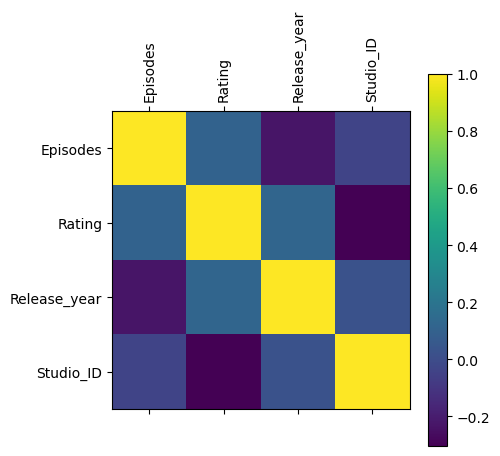

Episodes and Rating have a correlation of 0.10624168513644118
Episodes and Release_year have a correlation of -0.2296588361656566
Episodes and Studio_ID have a correlation of -0.035332899424565474
Rating and Release_year have a correlation of 0.11965064863570005
Rating and Studio_ID have a correlation of -0.30444764476331615
Release_year and Studio_ID have a correlation of 0.02347131989806189


In [1443]:
# Convert string values to numeric values
data = data.apply(pd.to_numeric, errors='coerce')

# Plot the correlation matrix
correlation_matrix = data.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

#give a numeric value for each correlation value and state what two columns are being compared
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation_value = correlation_matrix.iloc[i, j]
        print(correlation_matrix.columns[i], 'and', correlation_matrix.columns[j], 'have a correlation of', correlation_value)
        


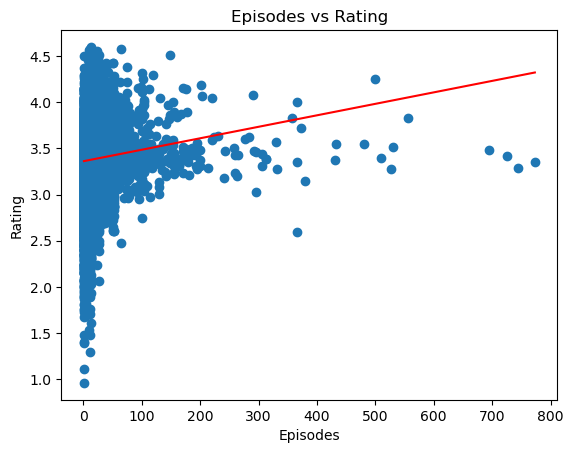

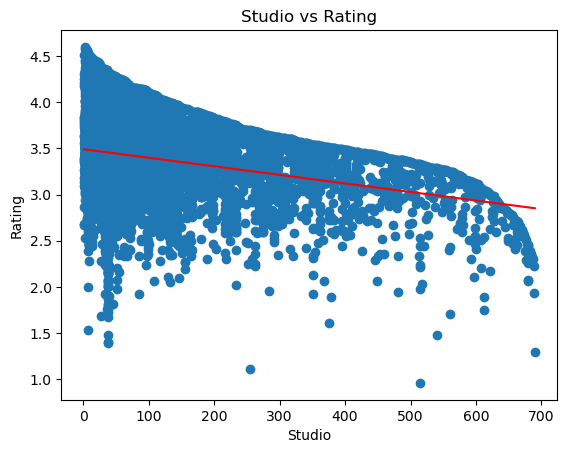

In [1444]:
##Multivariate Analysis

# Plot the data
plt.title('Episodes vs Rating')
plt.xlabel('Episodes')
plt.ylabel('Rating')
plt.scatter(data['Episodes'], data['Rating'])
plt.plot(np.unique(data['Episodes']), np.poly1d(np.polyfit(data['Episodes'], data['Rating'], 1))(np.unique(data['Episodes'])), color='red')
plt.show()

plt.title('Studio vs Rating')
plt.xlabel('Studio')
plt.ylabel('Rating')
plt.scatter(data['Studio_ID'], data['Rating'])
plt.plot(np.unique(data['Studio_ID']), np.poly1d(np.polyfit(data['Studio_ID'], data['Rating'], 1))(np.unique(data['Studio_ID'])), color='red')
plt.show()

In [1445]:
corr = pearsonr(data['Episodes'], data['Rating'])
print('Episodes vs Rating:', corr)

Episodes vs Rating: PearsonRResult(statistic=0.10624168513644354, pvalue=3.88675987312317e-22)


In [1446]:
corr = pearsonr(data['Studio_ID'], data['Rating'])
print('Studio vs Rating:', corr)

Studio vs Rating: PearsonRResult(statistic=-0.3044476447633157, pvalue=2.0459150762392743e-176)


In [1447]:
model = LinearRegression().fit(data[['Episodes']], data['Rating'])
Rating = np.array([Ratings for Ratings in range(0, 100)]).reshape(-1, 1)
model.fit(data[['Episodes']], data['Rating'])
r_sq = model.score(data[['Episodes']], data['Rating'])
print('coefficient of determination:', r_sq)

coefficient of determination: 0.011287295660631136


In [1448]:
model = LinearRegression().fit(data[['Studio_ID']], data['Rating'])
Rating = np.array([Ratings for Ratings in range(0, 100)]).reshape(-1, 1)
model.fit(data[['Studio_ID']], data['Rating'])
r_sq = model.score(data[['Studio_ID']], data['Rating'])
print('coefficient of determination:', r_sq)

coefficient of determination: 0.09268836840192929


In [1449]:
episodes = data['Episodes']
episodes = sm.add_constant(episodes)
model = sm.OLS(data['Rating'], episodes).fit()
print(model.summary())
print(model.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     94.13
Date:                Sun, 05 May 2024   Prob (F-statistic):           3.89e-22
Time:                        11:06:14   Log-Likelihood:                -4467.5
No. Observations:                8247   AIC:                             8939.
Df Residuals:                    8245   BIC:                             8953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3617      0.005    644.975      0.0

In [1450]:
studio_id = data['Studio_ID']
studio_id = sm.add_constant(studio_id)
model = sm.OLS(data['Rating'], studio_id).fit()
print(model.summary())
print(model.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     842.3
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.05e-176
Time:                        11:06:14   Log-Likelihood:                -4113.2
No. Observations:                8247   AIC:                             8230.
Df Residuals:                    8245   BIC:                             8245.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4919      0.006    611.563      0.0

In [1451]:
data = list(zip(data['Rating'], data['Episodes'], data['Studio_ID']))
print(data)

[(4.6, 13.0, 2), (4.58, 12.0, 3), (4.58, 64.0, 4), (4.57, 10.0, 5), (4.56, 24.0, 6), (4.55, 16.0, 6), (4.53, 10.0, 7), (4.51, 25.0, 7), (4.51, 26.0, 1), (4.51, 148.0, 9), (4.5, 12.0, 7), (4.5, 1.0, 11), (4.48, 12.0, 12), (4.48, 11.0, 13), (4.47, 25.0, 14), (4.46, 8.0, 3), (4.46, 11.0, 16), (4.46, 13.0, 4), (4.46, 13.0, 7), (4.45, 25.0, 17), (4.45, 12.0, 18), (4.45, 12.0, 12), (4.45, 11.0, 11), (4.45, 12.0, 20), (4.44, 14.0, 15), (4.44, 24.0, 10), (4.44, 15.0, 3), (4.44, 13.0, 14), (4.44, 24.0, 6), (4.44, 16.0, 21), (4.44, 12.0, 15), (4.44, 12.0, 15), (4.44, 12.0, 5), (4.44, 24.0, 22), (4.43, 25.0, 7), (4.43, 51.0, 14), (4.43, 12.0, 9), (4.43, 51.0, 15), (4.43, 11.0, 23), (4.43, 39.0, 24), (4.42, 12.0, 24), (4.42, 24.0, 5), (4.4, 13.0, 25), (4.4, 25.0, 13), (4.4, 11.0, 23), (4.4, 25.0, 4), (4.39, 13.0, 10), (4.39, 24.0, 12), (4.39, 25.0, 4), (4.38, 12.0, 4), (4.38, 75.0, 9), (4.38, 25.0, 14), (4.37, 24.0, 24), (4.37, 2.0, 27), (4.37, 39.0, 24), (4.37, 4.0, 2), (4.37, 26.0, 9), (4.37, 10

In [1452]:
data = pd.DataFrame(data, columns=['Rating', 'Episodes', 'Studio_ID'])
model = sm.OLS(data['Rating'], data).fit()
print(model.summary())
print(model.scale**0.5)

                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.248e+31
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        11:06:14   Log-Likelihood:                      2.4742e+05
No. Observations:                8247   AIC:                                 -4.948e+05
Df Residuals:                    8244   BIC:                                 -4.948e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [1453]:
##Mean squared error
all_data = data[['Rating', 'Episodes', 'Studio_ID']]
print(all_data)

# Calculating the mean squared error
all_data = sm.add_constant(all_data)
model = sm.OLS(data['Rating'], all_data).fit()
print(model.summary())
print("Mean Squared Error: ", model.scale**0.5)

      Rating  Episodes  Studio_ID
0       4.60      13.0          2
1       4.58      12.0          3
2       4.58      64.0          4
3       4.57      10.0          5
4       4.56      24.0          6
...      ...       ...        ...
8242    1.39       1.0         38
8243    1.30      12.0        690
8244    1.11       1.0        255
8245    0.96       1.0        515
8246    3.49       1.0         30

[8247 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.735e+28
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        11:06:14   Log-Likelihood:             2.3283e+05
No. Observations:                8247   AIC:                        -4.657e+05
Df Residuals: 

In [1454]:
print(model.mse_model)

481.01383514813466


In [1455]:
##Normalization

#Normalizing the rating column
data['Rating'] = (data['Rating'] - data['Rating'].min()) / (data['Rating'].max() - data['Rating'].min())
print(data['Rating'])

0       1.000000
1       0.994505
2       0.994505
3       0.991758
4       0.989011
          ...   
8242    0.118132
8243    0.093407
8244    0.041209
8245    0.000000
8246    0.695055
Name: Rating, Length: 8247, dtype: float64


In [1456]:
# Weighting and Aggregation
data['Weighted_Rating'] = data['Rating'] * 0.6
data['Weighted_Episodes'] = data['Episodes'] * 0.4

# Aggregating by Studio_ID
studio_grouped = data.groupby('Studio_ID').agg({
    'Weighted_Rating': 'mean',
    'Weighted_Episodes': 'mean'
}).reset_index()

print(studio_grouped)

     Studio_ID  Weighted_Rating  Weighted_Episodes
0            1         0.431604           3.712000
1            2         0.421703          11.247917
2            3         0.532418           8.285714
3            4         0.471346           6.510000
4            5         0.490154           4.560000
..         ...              ...                ...
606        686         0.220879           4.800000
607        687         0.220879           5.200000
608        688         0.209341           0.400000
609        689         0.159890           5.200000
610        690         0.056044           4.800000

[611 rows x 3 columns]


     Studio_ID  Weighted_Rating  Weighted_Episodes  Composite_Score
0            1         0.431604           3.712000         4.143604
1            2         0.421703          11.247917        11.669620
2            3         0.532418           8.285714         8.818132
3            4         0.471346           6.510000         6.981346
4            5         0.490154           4.560000         5.050154
..         ...              ...                ...              ...
606        686         0.220879           4.800000         5.020879
607        687         0.220879           5.200000         5.420879
608        688         0.209341           0.400000         0.609341
609        689         0.159890           5.200000         5.359890
610        690         0.056044           4.800000         4.856044

[611 rows x 4 columns]
     Studio_ID  Weighted_Rating  Weighted_Episodes  Composite_Score
335        371         0.421978         212.000000       212.421978
433        486         0

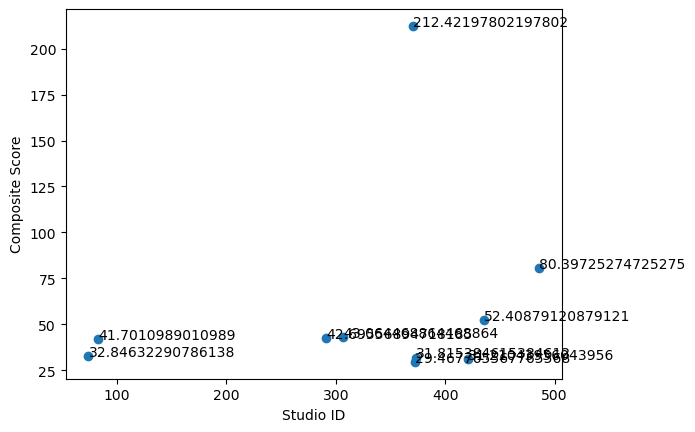

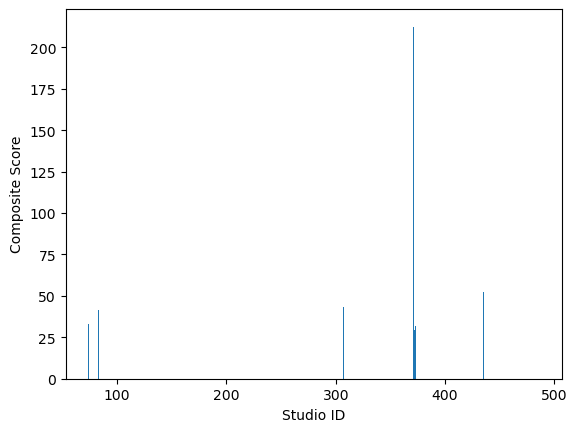

     Studio_ID  Weighted_Rating  Weighted_Episodes  Composite_Score
335        371         0.421978              212.0       212.421978
Creative Power Entertaining
The 'Release_year' column does not exist in the 'data' DataFrame.


In [1457]:
##Getting final composite score
studio_grouped['Composite_Score'] = studio_grouped['Weighted_Rating'] + studio_grouped['Weighted_Episodes']
print(studio_grouped)

#Getting the top 10 studios
top_studios = studio_grouped.nlargest(10, 'Composite_Score')
print(top_studios)

#explaining the composite score
print("=====================================================================================================")
print("The composite score is calculated by taking the weighted average of the rating and episodes of each show produced by the studio.") 
print("The rating is weighted at 60% and the episodes are weighted at 40%. The composite score is the sum of the weighted rating and weighted episodes.")
print("=====================================================================================================")

#Plotting the top 10 studios using a scatter plot with exact values written on the plot with labels on both axes
plt.scatter(top_studios['Studio_ID'], top_studios['Composite_Score'])
plt.xlabel('Studio ID')
plt.ylabel('Composite Score')
for i, txt in enumerate(top_studios['Composite_Score']):
    plt.annotate(txt, (top_studios['Studio_ID'].values[i], top_studios['Composite_Score'].values[i]))
plt.show()

#Making a bar plot of the top 10 studios with wider bars
plt.bar(top_studios['Studio_ID'], top_studios['Composite_Score'], width=0.5)
plt.xlabel('Studio ID')
plt.ylabel('Composite Score')
plt.show()

#print the top studio
top_studio = top_studios.nlargest(1, 'Composite_Score')
print(top_studio)

#use the studio_dict to get the name of the top studio
top_studio_name = {v: k for k, v in studio_dict.items()}[top_studio['Studio_ID'].values[0]]
print(top_studio_name)

#create a k-means clustering model using the release year and episodes columns and plot the clusters on a scatter plot
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['Release_year', 'Episodes']])
data['Cluster'] = kmeans.labels_
plt.scatter(data['Release_year'], data['Episodes'], c=data['Cluster'])
plt.xlabel('Release Year')
plt.ylabel('Episodes')
plt.show()


<ul>
    <li>My Anime list or MAL for short allows user to see the top rated anime shows: https://myanimelist.net/topanime.php</li>
    <li>LiveChart.me allows users to see when anime were release, the amount of episodes an anime has, all the shows that a studio has produced, and the average user score: https://www.livechart.me/spring-2024/tv</li>
<ul>
